In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

In [2]:
#Cleaned and filter data based on year 
pd.options.display.max_rows = None
crop_yield = pd.read_csv('Datasets/yield.csv') #Path may differ
crop_yield.drop(columns=['Domain Code', 'Domain', 'Area Code', 'Element', 'Element Code','Item Code','Year Code'], inplace = True)

crop_yield.columns = crop_yield.columns.str.replace('Area', 'Name')
crop_yield['Name'].replace({
    'China, Taiwan Province of':'Taiwan',
    'China, mainland': 'China',
    'China, Hong Kong SAR': 'Hong Kong, SAR',
    'Bahamas':'The Bahamas',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Czechia':'Czech Republic',
    'Gambia':'The Gambia' ,
    'Micronesia (Federated States of)':'Federated States of Micronesia',
    'Iran (Islamic Republic of)':'Islamic Republic of Iran',
    'Réunion': 'Reunion',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'United Republic of Tanzania': 'Tanzania' 
}, inplace = True)

crop_yield.columns = crop_yield.columns.str.replace('Value', 'Crop Yield')
filtered_cy = crop_yield[(crop_yield.Year >= 1990) & (crop_yield.Year <= 2016)]

211


169

In [3]:
rf1 = pd.read_excel('Datasets/Precipitation_1950-2014.xlsx')
rf2 = pd.read_excel('Datasets/Precipitation_2015-2100.xlsx')

#merge two rf data together
merged_rf = rf1.merge(rf2, on = ['code','name'])
print(merged_rf.name.unique)

merged_rf.loc[(merged_rf['code'] == 'REU') & (merged_rf['name'] == 'France'), 'name'] = 'Reunion'
merged_rf.loc[(merged_rf['code'] == 'GLP') & (merged_rf['name'] == 'France'), 'name'] = 'Guadeloupe'
merged_rf.loc[(merged_rf['code'] == 'GUF') & (merged_rf['name'] == 'France'), 'name'] = 'French Guiana'
merged_rf.loc[(merged_rf['code'] == 'MTQ') & (merged_rf['name'] == 'France'), 'name'] = 'Martinique'
merged_rf.loc[(merged_rf['code'] == 'MYT') & (merged_rf['name'] == 'France'), 'name'] = 'Mayotte'
merged_rf.loc[(merged_rf['code'] == 'TWN') & (merged_rf['name'] == 'China'), 'name'] = 'Taiwan'
merged_rf['name'].replace({
    'French Polynesia (Fr.)': 'French Polynesia',
    'American Samoa (U.S.)': 'American Samoa',
    'Bermuda (U.K.)' :'Bermuda',
    'Cayman Islands (U.K.)': 'Cayman Islands',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'D. P. R. of Korea': "Democratic People's Republic of Korea",
    'Arab Republic of Egypt': 'Egypt',
    'Faroe Islands (Den.)': 'Faroe Islands',
    'Guam (U.S.)':'Guam', 
    'Montserrat (U.K.)' :'Montserrat',
    'Moldova': 'Republic of Moldova',
    'Niue (N.Z.)': 'Niue',
    'New Caledonia (Fr.)': 'New Caledonia',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Türkiye': 'Turkey',
    'Puerto Rico (U.S.)':'Puerto Rico',
    'Viet Nam': 'Vietnam',
    'Republic of Yemen': 'Yemen',
    'Slovak Republic': 'Slovakia' ,
    'Wallis and Futuna (Fr.)':'Wallis and Futuna Islands',
    'R. B. de Venezuela': 'Venezuela',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}, inplace = True)

print(merged_rf.name.unique())
merged_rf.drop('code', axis = 1, inplace=True)
merged_rf.columns = merged_rf.columns.str.replace('-07', '')
merged_rf.columns = merged_rf.columns.str.replace('name', 'Name')

country = ['Name']
year = merged_rf.columns.difference(country) #takes every column except for country(name and code)

#id_vars will remain the same while the value_vars now would become the value in the 'Year' column
rf = pd.melt(merged_rf, id_vars = country, value_vars = year, 
                  var_name = 'Year', value_name = 'Precipitation')

rf['Year'] = rf['Year'].astype(int)

filtered_rf = rf[(rf.Year >= 1990) & (rf.Year <= 2016)]


<bound method Series.unique of 0                                          Aruba (Neth.)
1                                            Afghanistan
2                                                 Angola
3                                        Anguilla (U.K.)
4                                                Finland
5                                                Albania
6                                                Andorra
7                                   United Arab Emirates
8                                              Argentina
9                                                Armenia
10                                 American Samoa (U.S.)
11             French Southern and Antarctic Lands (Fr.)
12                                   Antigua and Barbuda
13                                             Australia
14                                               Austria
15                                            Azerbaijan
16                                               Burundi


In [4]:
temp1 = pd.read_excel('Datasets/Surface Air Temperature_1950-2014.xlsx')
temp2 = pd.read_excel('Datasets/Surface Air Temp_2015-2100.xlsx')

merged_temp = temp1.merge(temp2, on = ['code','name'])

#REPLACING NAMES IS HERE 
merged_temp.loc[(merged_temp['code'] == 'REU') & (merged_temp['name'] == 'France'), 'name'] = 'Reunion'
merged_temp.loc[(merged_temp['code'] == 'GLP') & (merged_temp['name'] == 'France'), 'name'] = 'Guadeloupe'
merged_temp.loc[(merged_temp['code'] == 'GUF') & (merged_temp['name'] == 'France'), 'name'] = 'French Guiana'
merged_temp.loc[(merged_temp['code'] == 'MTQ') & (merged_temp['name'] == 'France'), 'name'] = 'Martinique'
merged_temp.loc[(merged_temp['code'] == 'MYT') & (merged_temp['name'] == 'France'), 'name'] = 'Mayotte'
merged_temp.loc[(merged_temp['code'] == 'TWN') & (merged_temp['name'] == 'China'), 'name'] = 'Taiwan'
merged_temp['name'].replace({
    'French Polynesia (Fr.)': 'French Polynesia',
    'American Samoa (U.S.)': 'American Samoa',
    'Bermuda (U.K.)' :'Bermuda',
    'Cayman Islands (U.K.)': 'Cayman Islands',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'D. P. R. of Korea': "Democratic People's Republic of Korea",
    'Arab Republic of Egypt': 'Egypt',
    'Faroe Islands (Den.)': 'Faroe Islands',
    'Guam (U.S.)':'Guam', 
    'Montserrat (U.K.)' :'Montserrat',
    'Moldova': 'Republic of Moldova',
    'Niue (N.Z.)': 'Niue',
    'New Caledonia (Fr.)': 'New Caledonia',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Türkiye': 'Turkey',
    'Puerto Rico (U.S.)':'Puerto Rico',
    'Viet Nam': 'Vietnam',
    'Republic of Yemen': 'Yemen',
    'Slovak Republic': 'Slovakia' ,
    'Wallis and Futuna (Fr.)':'Wallis and Futuna Islands',
    'R. B. de Venezuela': 'Venezuela',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}, inplace = True)
merged_temp.drop('code', axis = 1, inplace=True)
merged_temp.columns = merged_temp.columns.str.replace('-07', '')
merged_temp.columns = merged_temp.columns.str.replace('name', 'Name')
year = merged_temp.columns.difference(country)


temp = pd.melt(merged_temp, id_vars = country, value_vars = year,
               var_name = 'Year', value_name = 'Temperature')

temp['Year'] = temp['Year'].astype(int)
filtered_temp = temp[(temp.Year >= 1990) & (temp.Year <= 2016)]

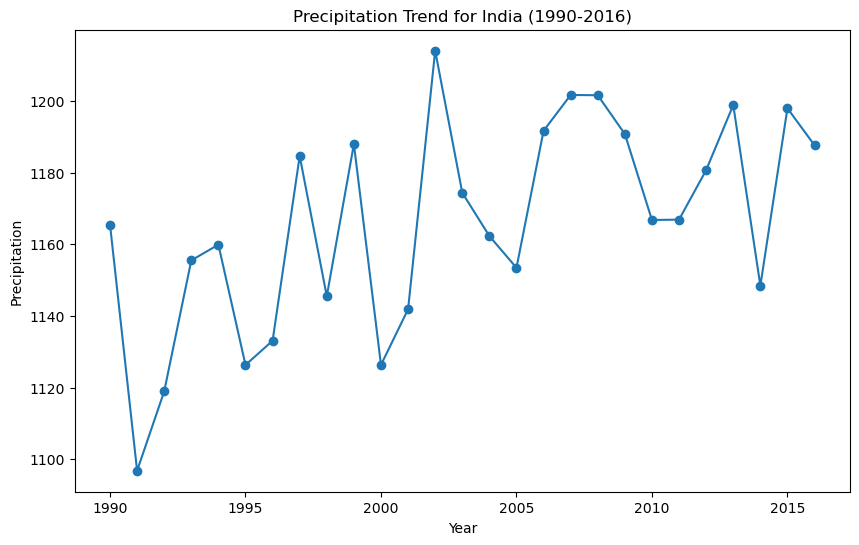

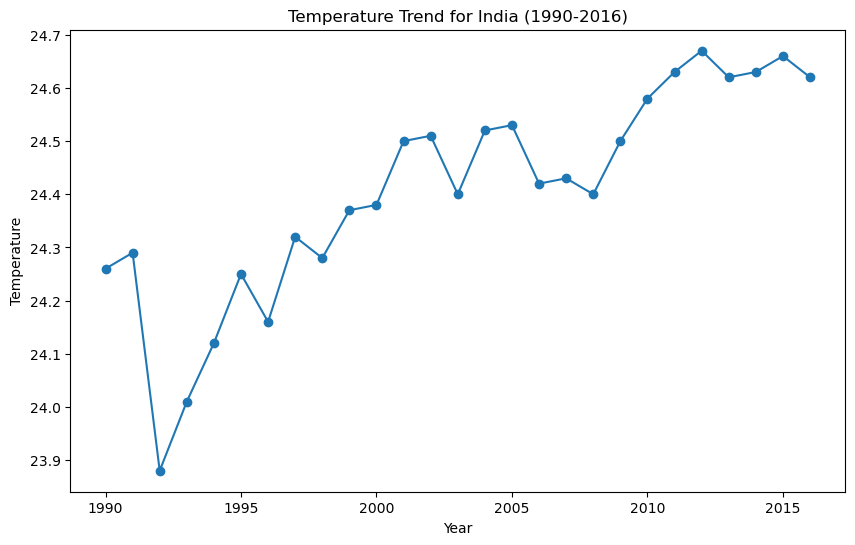

<Figure size 640x480 with 0 Axes>

In [6]:
#visualise trend
def precipitation_trend(country_name):
    country_data = filtered_rf[filtered_rf['Name'] == country_name]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Precipitation'], marker='o')
    plt.title(f'Precipitation Trend for {country_name} (1990-2016)')
    plt.xlabel('Year')
    plt.ylabel('Precipitation')
    plt.show()

def temp_trend(country_name):
    country_data = filtered_temp[filtered_temp['Name'] == country_name]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Temperature'], marker='o')
    plt.title(f'Temperature Trend for {country_name} (1990-2016)')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.show()


#plot trend based on country
precipitation_trend('India') 
temp_trend('India')

In [19]:
merged_data = filtered_cy.merge(filtered_rf, on = ['Name', 'Year'])
merged_data = merged_data.merge(filtered_temp, on = ['Name', 'Year'])

,Name,Item,Year,Unit,Crop Yield,Precipitation,Temperature
5228,China,Cassava,1990,hg/ha,139135,830.52,6.75
5229,China,Maize,1990,hg/ha,45252,830.52,6.75
5230,China,Potatoes,1990,hg/ha,113209,830.52,6.75
5231,China,"Rice, paddy",1990,hg/ha,57166,830.52,6.75
5232,China,Sorghum,1990,hg/ha,36779,830.52,6.75
5233,China,Soybeans,1990,hg/ha,14554,830.52,6.75
5234,China,Sweet potatoes,1990,hg/ha,166382,830.52,6.75
5235,China,Wheat,1990,hg/ha,31941,830.52,6.75
5236,China,Cassava,1990,hg/ha,139130,830.52,6.75
5237,China,Maize,1990,hg/ha,45240,830.52,6.75


In [18]:
merged_data.to_csv('Q2merged_rf_temp_crop data.csv')

Available crop types in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat


Enter number of choice to compare:  8


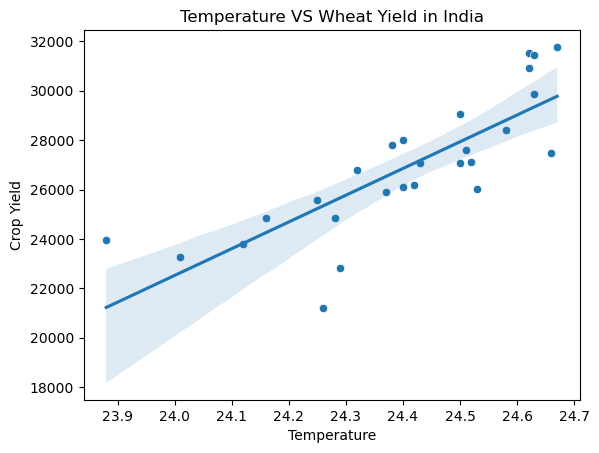

In [12]:
#crop_temp_scatter('India', 'Wheat')
def crop_temp_scatter(country_name):
    country_data = merged_data[merged_data['Name'] == country_name]
    crop_available = country_data['Item'].unique()
    print(f"Available crop types in {country_name}:")
    for i, crop in enumerate(crop_available, 1):
        print(f"{i}. {crop}")
    choice = int(input("Enter number of choice to compare: ")) - 1
    selected_crop = crop_available[choice]
    crop_data = country_data[country_data['Item'] == selected_crop]
    ct_s = sns.scatterplot(x='Temperature', y='Crop Yield', data=crop_data)
    ct_s.set_title(f'Temperature VS {selected_crop} Yield in {country_name}')
    sns.regplot(x='Temperature', y='Crop Yield', data=crop_data, scatter=False, ax=ct_s)
    plt.show()
crop_temp_scatter('India')


Available crop types in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat


Enter number of choice to compare:  8


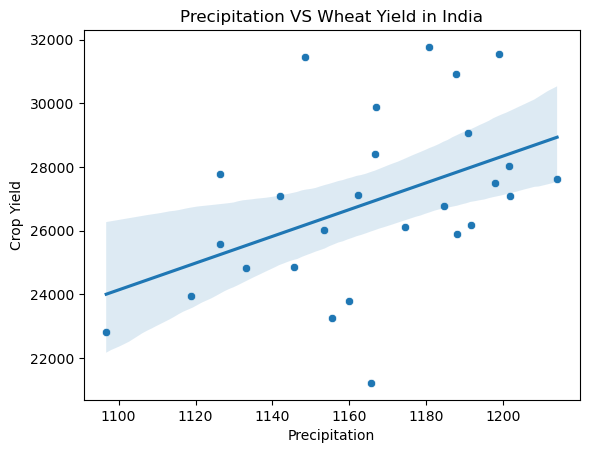

In [17]:
def crop_rf_scatter(country_name):
    country_data = merged_data[merged_data['Name'] == country_name]
    crop_available = country_data['Item'].unique()
    print(f"Available crop types in {country_name}:")
    for i, crop in enumerate(crop_available, 1):
        print(f"{i}. {crop}")
    choice = int(input("Enter number of choice to compare: ")) - 1
    selected_crop = crop_available[choice]
    crop_data = country_data[country_data['Item'] == selected_crop]
    crf_s = sns.scatterplot(x='Precipitation', y='Crop Yield', data=crop_data)
    crf_s.set_title(f'Precipitation VS {selected_crop} Yield in {country_name}')
    sns.regplot(x='Precipitation', y='Crop Yield', data=crop_data, scatter=False, ax=crf_s)
    plt.show()

crop_rf_scatter('India')